<>:69: SyntaxWarning: invalid escape sequence '\l'
<>:69: SyntaxWarning: invalid escape sequence '\l'
/var/folders/pg/z91v_pc17db_f4_zcy_19j0h0000gp/T/ipykernel_6992/392828754.py:69: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Trace Plot of $\lambda$')


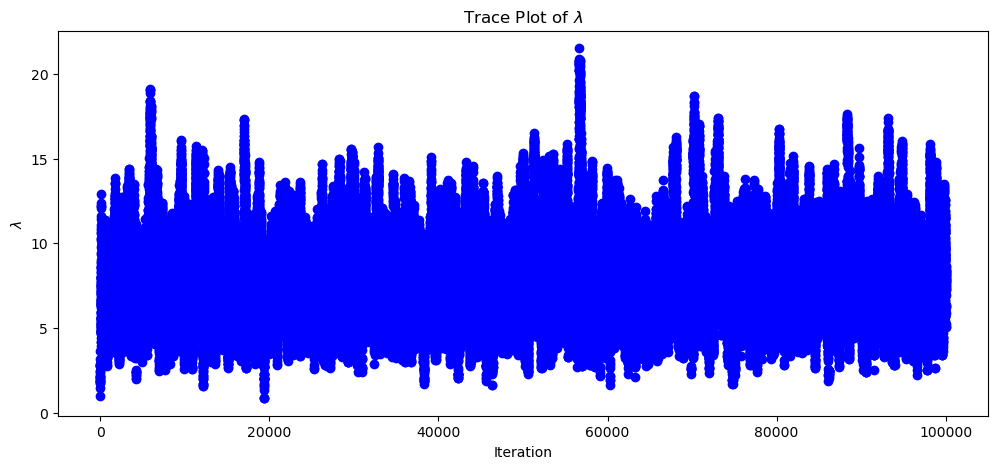

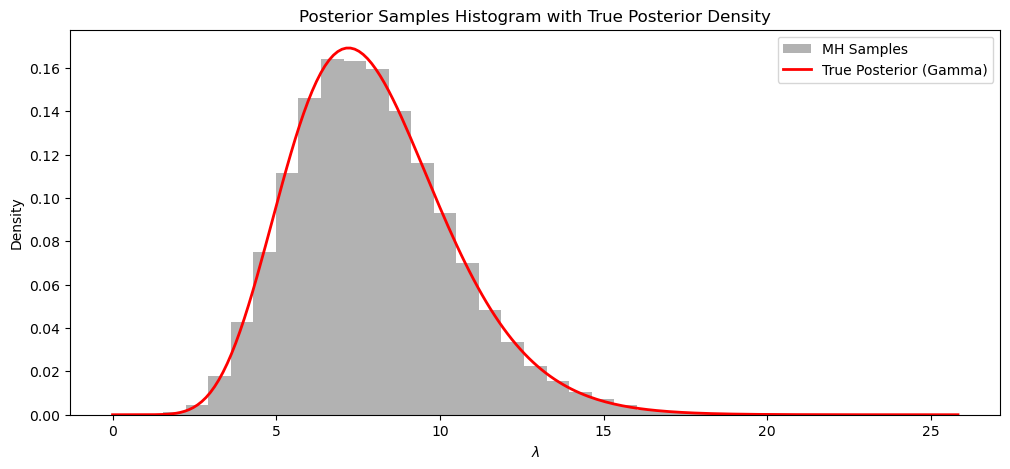

Expected Value of lambda: 7.96


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# ----------------------------
# 1. Simulate Some Data
# ----------------------------
# For example, suppose the true lambda is 2.0, and we have 50 observations.
true_lambda = 10
n = 10  # number of observations
data = np.random.exponential(scale=1/true_lambda, size=n)  # exponential scale is 1/lambda

# ----------------------------
# 2. Define the Prior and the Unnormalized Posterior
# ----------------------------
# Prior: lambda ~ Gamma(a, b)
a = 0.5  # shape parameter of the prior
b = 0.5  # rate parameter of the prior

# Unnormalized posterior:
# f(lambda) ∝ lambda^(n+a-1) * exp(-lambda * (sum(data) + b))
def unnormalized_posterior(lam):
    if lam <= 0:
        return 0  # lambda must be positive!
    return (lam**(n + a - 1)) * np.exp(-lam * (np.sum(data) + b))

# For reference, the true posterior is a Gamma distribution with:
shape_post = n + a              # shape parameter
rate_post = np.sum(data) + b      # rate parameter (note: scale = 1/rate)

# ----------------------------
# 3. Metropolis–Hastings Algorithm
# ----------------------------
iterations = 100000      # total number of iterations for our chain
sigma = 0.5            # standard deviation for our proposal distribution

# Initialize the chain with a starting value, e.g., lambda = 1
chain = np.zeros(iterations)
chain[0] = 1.0

for i in range(1, iterations):
    current = chain[i-1]
    # Propose a new lambda by drawing from a normal distribution centered at 'current'
    proposed = np.random.normal(current, sigma)
    
    # If the proposed lambda is not positive, automatically reject it.
    if proposed <= 0:
        chain[i] = current
        continue
    
    # Calculate the acceptance ratio
    ratio = unnormalized_posterior(proposed) / unnormalized_posterior(current)
    acceptance_prob = min(1, ratio)
    
    # Draw a random number from U(0,1) to decide if we accept
    u = np.random.uniform(0, 1)
    if u < acceptance_prob:
        chain[i] = proposed
    else:
        chain[i] = current

samples = chain[:]

# (a) Trace Plot: Shows lambda values over iterations.
plt.figure(figsize=(12, 5))
plt.scatter(np.arange(len(chain)), chain, color='blue')
plt.xlabel('Iteration')
plt.ylabel(r'$\lambda$')
plt.title('Trace Plot of $\lambda$')
plt.show()

# (b) Histogram: Shows the distribution of the sampled lambda values.
plt.figure(figsize=(12, 5))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='gray', label='MH Samples')

# Overlay the true posterior density (which is Gamma(shape_post, rate_post))
x = np.linspace(0, np.max(samples)*1.2, 200)
y = gamma.pdf(x, a=shape_post, scale=1/rate_post)  # scale is 1/rate
plt.plot(x, y, 'r-', lw=2, label='True Posterior (Gamma)')
plt.xlabel(r'$\lambda$')
plt.ylabel('Density')
plt.title('Posterior Samples Histogram with True Posterior Density')
plt.legend()
plt.show()

expected_val_true_lambda = (n+a) / (np.sum(data)+b)
print(f"Expected Value of lambda: {expected_val_true_lambda:.2f}")
